In [1]:
import matplotlib.pyplot as plt

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

tick_major = 6
tick_minor = 4
plt.rcParams["xtick.major.size"] = tick_major
plt.rcParams["xtick.minor.size"] = tick_minor
plt.rcParams["ytick.major.size"] = tick_major
plt.rcParams["ytick.minor.size"] = tick_minor

font_small = 12
font_medium = 13
font_large = 14
plt.rc('font', size=font_small)          # controls default text sizes
plt.rc('axes', titlesize=font_medium)    # fontsize of the axes title
plt.rc('axes', labelsize=font_medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_small)    # legend fontsize
plt.rc('figure', titlesize=font_large)   # fontsize of the figure title

## Getting started
### Loading data

In [2]:
from pyibt import read_ibt
ibt = read_ibt('demo.ibt')

### Accessing file information

In [3]:
print('ibt file name:', ibt.name)
print('Number of sweeps:', len(ibt.sweeps))

ibt file name: demo
Number of sweeps: 28


### Accessing sweep data

In [4]:
sweep = ibt.sweeps[0]
print('Recording mode:', sweep.rec_mode)
print('Sweep data:', sweep.data)
print('Recording mode:', sweep.y_label)
print('Sweep time:', sweep.time)
print('Recording mode:', sweep.x_label)
print('Sweep command:', sweep.command)

Recording mode: current clamp
Sweep data: [-63.18666667 -62.98666667 -62.89333333 ... -62.98666667 -62.98666667
 -63.18666667]
Recording mode: Membrane Potential (mV)
Sweep time: [0.0000e+00 2.0000e-05 4.0000e-05 ... 9.9994e-01 9.9996e-01 9.9998e-01]
Recording mode: Time (seconds)
Sweep command: [0. 0. 0. ... 0. 0. 0.]


### Quick plot functions

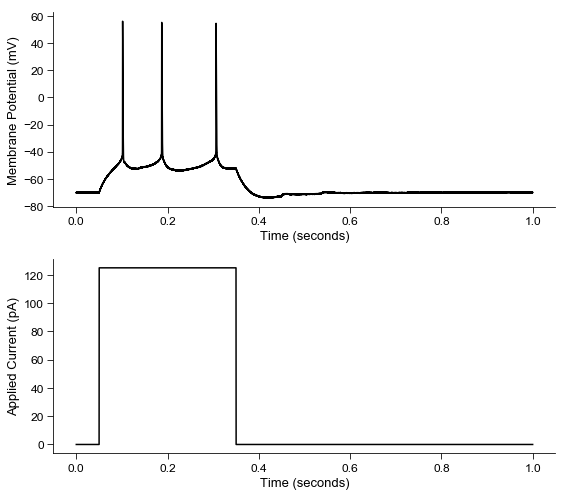

In [5]:
fig = plt.figure(figsize=(8, 7))
ax1 = fig.add_subplot(211)
ax1 = ibt.plot_sweep(sweep_num=16, ax=ax1)

ax2 = fig.add_subplot(212)
ax2 = ibt.plot_command(sweep_num=16, ax=ax2)
plt.tight_layout()

plt.savefig('example_plots/single_sweep.png')

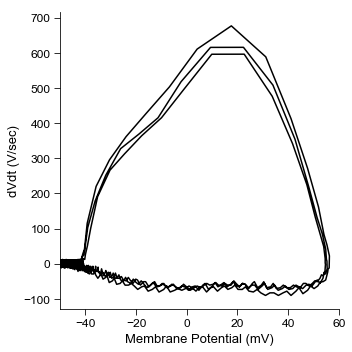

In [6]:
fig = plt.figure(figsize=(5, 5))
ax=ibt.plot_sweep_phase_plane(sweep_num=16)
ax.set_xlim(-50, 60)
plt.tight_layout()

plt.savefig('example_plots/phase_plane.png')

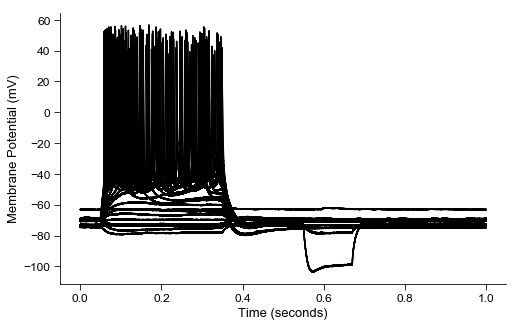

In [7]:
fig=plt.figure(figsize=(8,5))
ax=ibt.plot_all_sweeps()

plt.savefig('example_plots/all_sweeps.png')

### Get creative

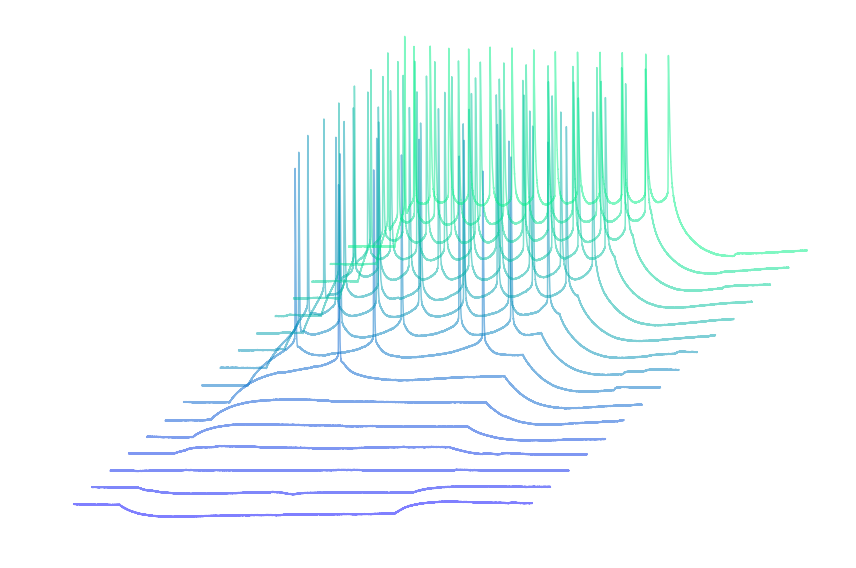

In [8]:
sweeps = ibt.sweeps[9:25]
cm = plt.get_cmap("winter")
colors = [cm(i/len(sweeps)) for i, x in enumerate(sweeps)]

plt.figure(figsize=(12, 8))
for i, sweep in enumerate(sweeps):
    num_pnts = int(0.5/sweep.dx)
    x = sweep.time[:num_pnts] + 0.02 * i
    y = sweep.data[:num_pnts] + 10 * i
    plt.plot(x, y, color=colors[i], alpha=0.5)
plt.gca().axis('off')
plt.savefig('example_plots/fancy_FI_plot.png')
plt.tight_layout()

plt.show()

### Automatic detection of action potentials

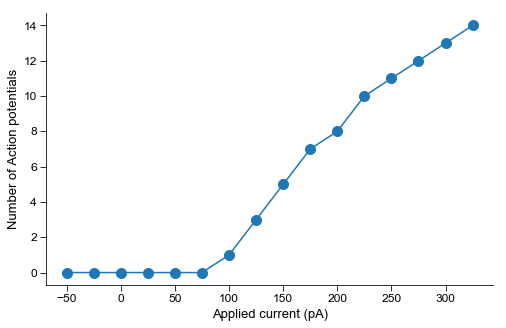

In [9]:
command = 4
sweeps = ibt.sweeps[9:25]

num_APs = []
current = []
for sweep  in sweeps:
    num_APs.append(len(sweep.spike_times_during_command(command)))
    current.append(sweep.commands[4]['value'])

fig=plt.figure(figsize=(8, 5))
plt.plot(current, num_APs, '-o', markersize=10)
plt.ylabel('Number of Action potentials')
plt.xlabel('Applied current (pA)')
plt.savefig('example_plots/FI_curve.png')

plt.show()


### Automatic characterization of action potentials

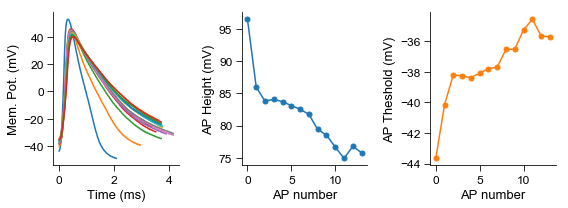

In [17]:
sweep = ibt.sweeps[25]
spikes = sweep.spike_properties()

spike_num = [x for x in range(len(spikes))]
spike_height = [spike['height'] for spike in spikes]
spike_thresh = [spike['thresh'] for spike in spikes]

fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(131)
for spike in spikes:
    ax1.plot(spike['time'] * 1000, spike['Vm'])
ax1.set_ylabel('Mem. Pot. (mV)')
ax1.set_xlabel('Time (ms)')

ax2 = fig.add_subplot(132)
ax2.plot(spike_num,spike_height, '-o', markersize=5)
ax2.set_ylabel('AP Height (mV)')
ax2.set_xlabel('AP number')

ax3 = fig.add_subplot(133)
ax3.plot(spike_num,spike_thresh, '-o', markersize=5, color='tab:orange')
ax3.set_ylabel('AP Theshold (mV)')
ax3.set_xlabel('AP number')
plt.tight_layout()
plt.savefig('example_plots/AP_char.png')

